# **Introduction**

Postnatal depression is a serious mental health issue affecting many women after childbirth. Early detection can lead to better mental health outcomes and improved quality of life for both mother and child.

## **Data Source**
The analysis in this project is based on the publicly available dataset from Kaggle:

#### [PostPartum Depression Dataset](https://www.kaggle.com/datasets/parvezalmuqtadir2348/postpartum-depression)

This dataset provides various indicators relevant to postpartum depression in new mothers. It originates from a questionnaire distributed by a medical hospital.

### **Data Background**
Although the dataset lacks a direct target variable for "feeling depressed," the authors have proposed using the variable **feeling anxious** as a reliable predictor for postpartum depression, making it the primary target for this project.

## **Data Dictionary**

Below is a summary of the features and variables included in the dataset:

| **Variable**                       | **Description**                       |
| ----------------------------------- | ------------------------------------- |
| **Timestamp**                      | mm/dd/yyyy hh:mm                      |
| **Age**                             | Age group of the respondent (e.g., 25-30, 30-35, etc.) |
| **Feeling sad or tearful**          |  yes, no, sometimes   |
| **Irritable towards baby & partner**| yes, no, sometimes      |
| **Trouble sleeping at night**       | yes, no, two or more days a week |
| **Problems concentrating or making decisions** | yes, no, often   |
| **Overeating or loss of appetite**  | yes, no, not at all |
| **Feeling anxious**                 | yes, no               |
| **Feeling of guilt**                | yes, no, maybe        |
| **Problems bonding with baby**      | yes, no, sometimes    |
| **Suicide attempt**                 | yes, no, not interested to say |

### **Target Variable**
The variable used as the target in this project is:
- **Feeling Anxious**


# Import libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import RocCurveDisplay


In [105]:
df = pd.read_csv('/content/post natal data.csv')
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

# Exploratory data analysis

## Data preprocessing

In [107]:
df.drop('Timestamp', axis=1, inplace=True)

In [108]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("&", "and")
df.head()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [109]:
df.isnull().sum()

,0
age,0
feeling_sad_or_tearful,0
irritable_towards_baby_and_partner,6
trouble_sleeping_at_night,0
problems_concentrating_or_making_decision,12
overeating_or_loss_of_appetite,0
feeling_anxious,0
feeling_of_guilt,9
problems_of_bonding_with_baby,0
suicide_attempt,0


<Axes: >

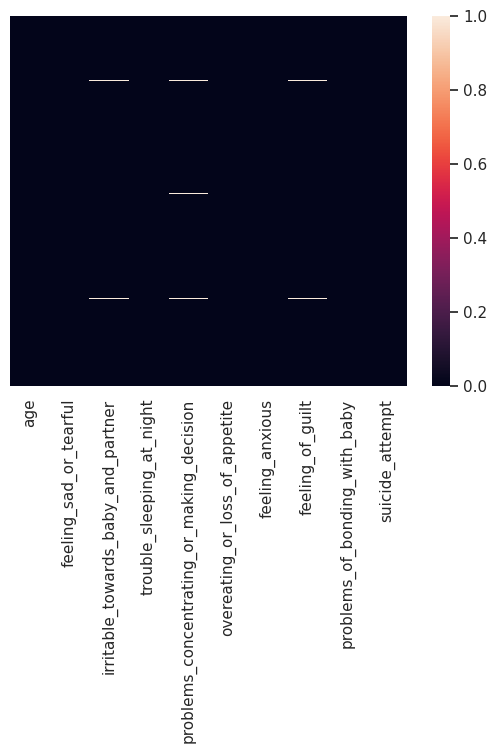

In [110]:
sns.heatmap(df.isnull(),yticklabels=False)

**bold text**### Impute Data
### Use mode for data imputation as the data is categorical

In [111]:
df['irritable_towards_baby_and_partner'].value_counts()

,count
irritable_towards_baby_and_partner,
Yes,555
No,499
Sometimes,443


In [112]:
mode = df['irritable_towards_baby_and_partner'].mode()[0]
mode

'Yes'

In [113]:
df['irritable_towards_baby_and_partner'] = df['irritable_towards_baby_and_partner'].fillna(mode)
df.isnull().sum()

,0
age,0
feeling_sad_or_tearful,0
irritable_towards_baby_and_partner,0
trouble_sleeping_at_night,0
problems_concentrating_or_making_decision,12
overeating_or_loss_of_appetite,0
feeling_anxious,0
feeling_of_guilt,9
problems_of_bonding_with_baby,0
suicide_attempt,0


In [114]:
df['problems_concentrating_or_making_decision'].value_counts()

,count
problems_concentrating_or_making_decision,
No,583
Often,473
Yes,435


In [115]:
mode1 = df['problems_concentrating_or_making_decision'].mode()[0]
mode1

'No'

In [116]:
df['problems_concentrating_or_making_decision'] = df['problems_concentrating_or_making_decision'].fillna(mode1)
df.isnull().sum()

,0
age,0
feeling_sad_or_tearful,0
irritable_towards_baby_and_partner,0
trouble_sleeping_at_night,0
problems_concentrating_or_making_decision,0
overeating_or_loss_of_appetite,0
feeling_anxious,0
feeling_of_guilt,9
problems_of_bonding_with_baby,0
suicide_attempt,0


In [117]:
df['feeling_of_guilt'].value_counts()

,count
feeling_of_guilt,
No,624
Maybe,528
Yes,342


In [118]:
mode2 = df['feeling_of_guilt'].mode()[0]
mode2

'No'

In [119]:
df['feeling_of_guilt'] = df['feeling_of_guilt'].fillna(mode2)
df.isnull().sum()

,0
age,0
feeling_sad_or_tearful,0
irritable_towards_baby_and_partner,0
trouble_sleeping_at_night,0
problems_concentrating_or_making_decision,0
overeating_or_loss_of_appetite,0
feeling_anxious,0
feeling_of_guilt,0
problems_of_bonding_with_baby,0
suicide_attempt,0


<Axes: >

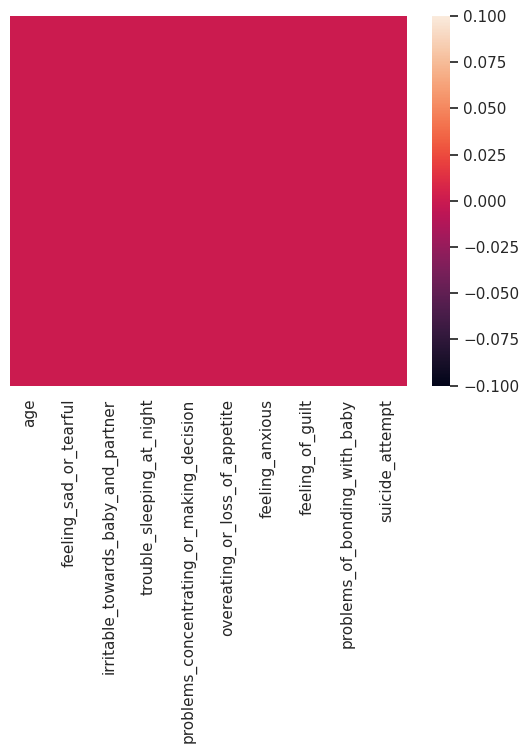

In [120]:
sns.heatmap(df.isnull(),yticklabels=False)

# Data Vislualization

/tmp/ipython-input-1643709960.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "age", data = df, palette="Set3")


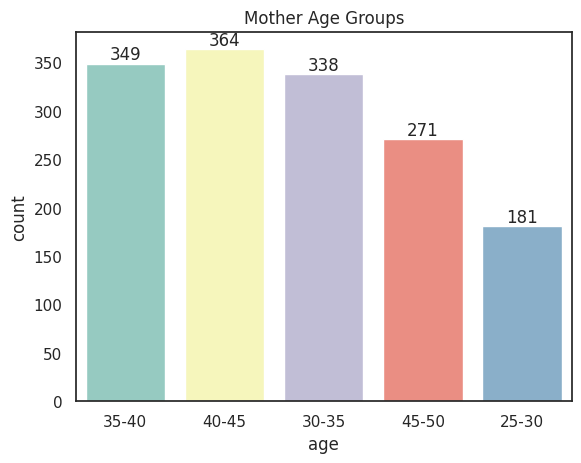

In [121]:
ax = sns.countplot(x = "age", data = df, palette="Set3")
plt.title('Mother Age Groups')

for label in ax.containers:
    ax.bar_label(label)

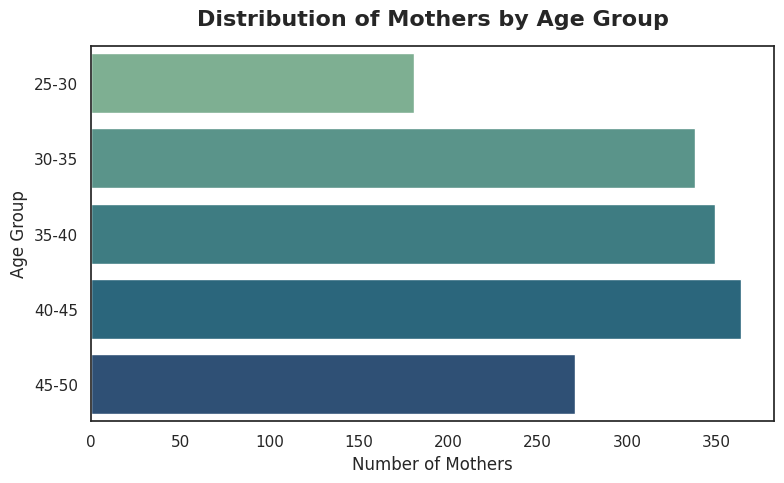

In [122]:
sns.set(style="white")

age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x=age_counts.values,
    y=age_counts.index,
    palette="crest",
    hue = age_counts.index,

)
plt.title("Distribution of Mothers by Age Group", fontsize=16, weight='bold', pad=15)
plt.xlabel("Number of Mothers")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Mother Age Groups')

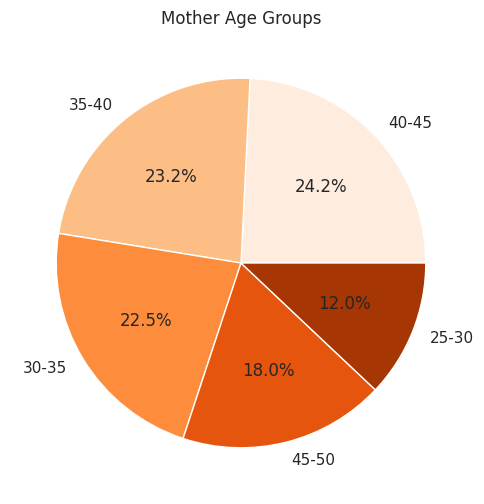

In [123]:
plt.figure(figsize=(12,6))
labels = df.age.value_counts().index
plt.pie(df.age.value_counts(), labels = labels, autopct='%1.1f%%', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603'])
plt.title('Mother Age Groups')

##### *Women between the ages of 25 through 50 are included in this study. The largest group ranges between the ages of 40 through 45. The smallest respondent group is between the ages of 25 through 30.*



The target column is *feeling_anxious*

In [124]:
df.feeling_anxious.value_counts()

,count
feeling_anxious,
Yes,980
No,523


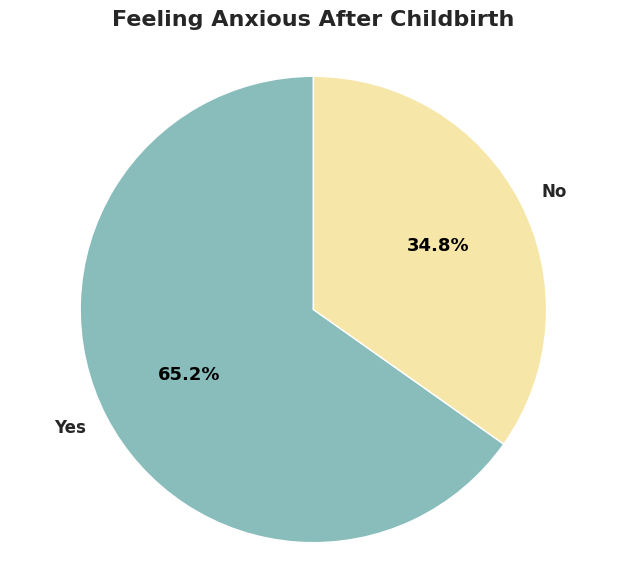

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply clean Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Count values
counts = df['feeling_anxious'].value_counts()
labels = counts.index
sizes = counts.values
colors = ['#88BDBC', '#F6E7A9']  # soft teal and pastel yellow

# Plot
fig, ax = plt.subplots(figsize=(6.5,6))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':12, 'weight':'bold'},
    wedgeprops={'linewidth':1, 'edgecolor':'white'}
)

# Refine label visibility
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(13)

# Equal aspect ratio ensures perfect circle
ax.axis('equal')

# Title
ax.set_title("Feeling Anxious After Childbirth", fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


In [126]:
df.feeling_sad_or_tearful.value_counts()

,count
feeling_sad_or_tearful,
Yes,536
No,524
Sometimes,443


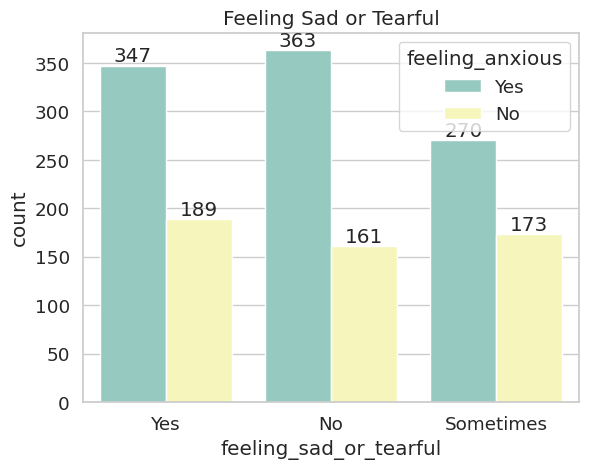

In [127]:
ax = sns.countplot(x = "feeling_sad_or_tearful", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Feeling Sad or Tearful')
for label in ax.containers:
    ax.bar_label(label)

In [128]:
df.irritable_towards_baby_and_partner.value_counts()

,count
irritable_towards_baby_and_partner,
Yes,561
No,499
Sometimes,443


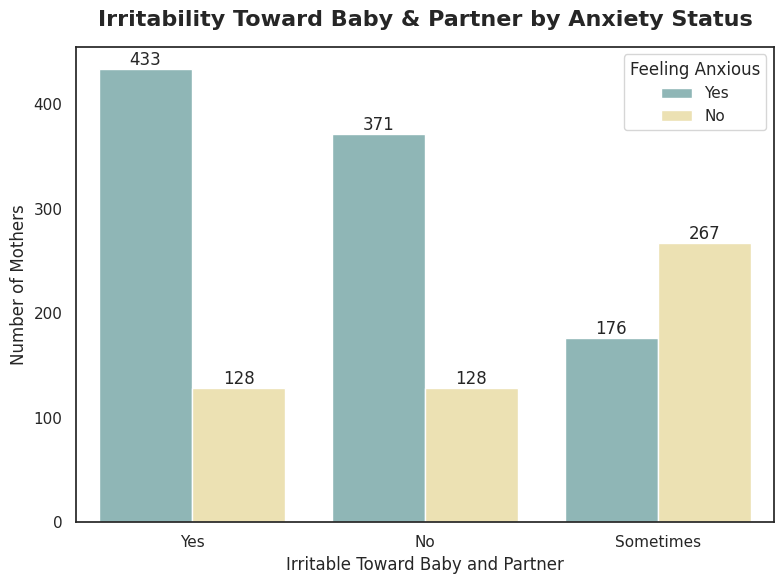

In [129]:
sns.set(style="white")

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df,
    x='irritable_towards_baby_and_partner',
    hue='feeling_anxious',
    palette=['#88BDBC','#F6E7A9']
)

plt.title("Irritability Toward Baby & Partner by Anxiety Status", fontsize=16, weight='bold', pad=15)
plt.xlabel("Irritable Toward Baby and Partner")
plt.ylabel("Number of Mothers")
plt.legend(title="Feeling Anxious")

for label in ax.containers:
    ax.bar_label(label)

plt.tight_layout()
plt.show()


In [130]:
df.trouble_sleeping_at_night.value_counts()

,count
trouble_sleeping_at_night,
Two or more days a week,640
Yes,445
No,418


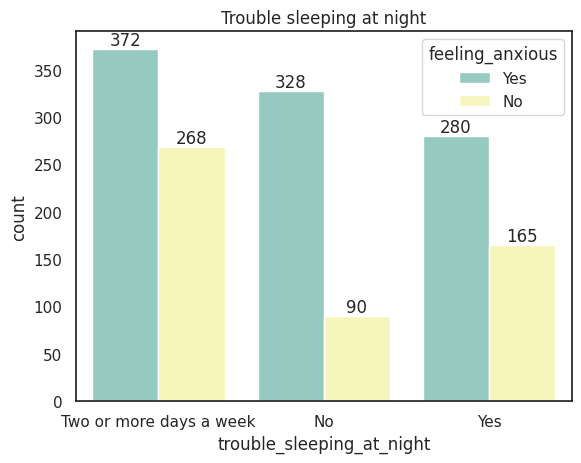

In [131]:
ax = sns.countplot(x = "trouble_sleeping_at_night", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Trouble sleeping at night')
for label in ax.containers:
    ax.bar_label(label)

In [132]:
df.problems_concentrating_or_making_decision.value_counts()

,count
problems_concentrating_or_making_decision,
No,595
Often,473
Yes,435


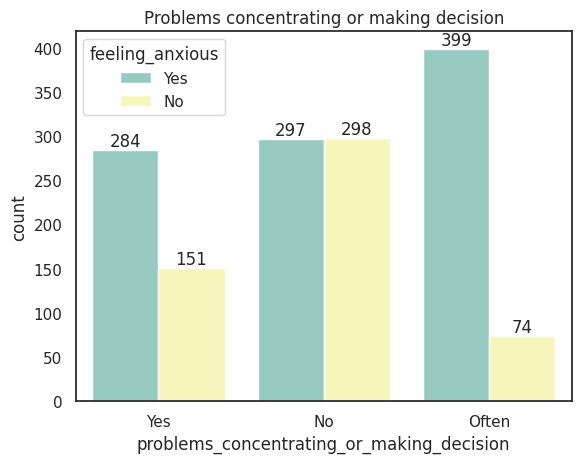

In [133]:
ax = sns.countplot(x = "problems_concentrating_or_making_decision", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Problems concentrating or making decision')
for label in ax.containers:
    ax.bar_label(label)

In [134]:
df.overeating_or_loss_of_appetite.value_counts()

,count
overeating_or_loss_of_appetite,
No,841
Yes,343
Not at all,319


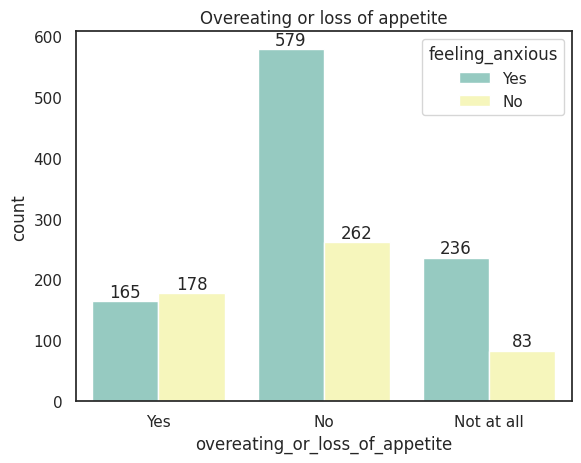

In [135]:
ax = sns.countplot(x = "overeating_or_loss_of_appetite", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Overeating or loss of appetite')
for label in ax.containers:
    ax.bar_label(label)

In [136]:
df.feeling_of_guilt.value_counts()

,count
feeling_of_guilt,
No,633
Maybe,528
Yes,342


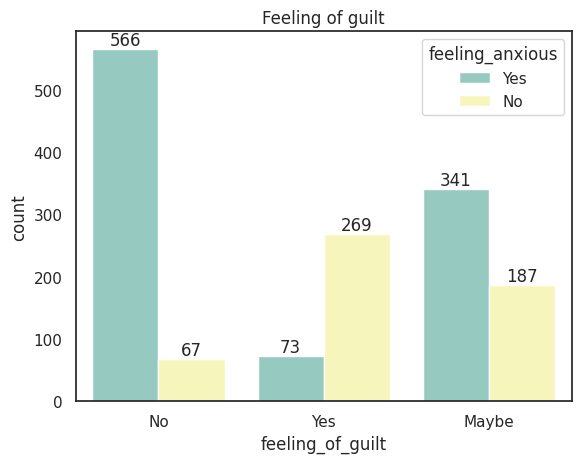

In [137]:
ax = sns.countplot(x = "feeling_of_guilt", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Feeling of guilt')
for label in ax.containers:
    ax.bar_label(label)

In [138]:
df.problems_of_bonding_with_baby.value_counts()

,count
problems_of_bonding_with_baby,
No,557
Sometimes,542
Yes,404


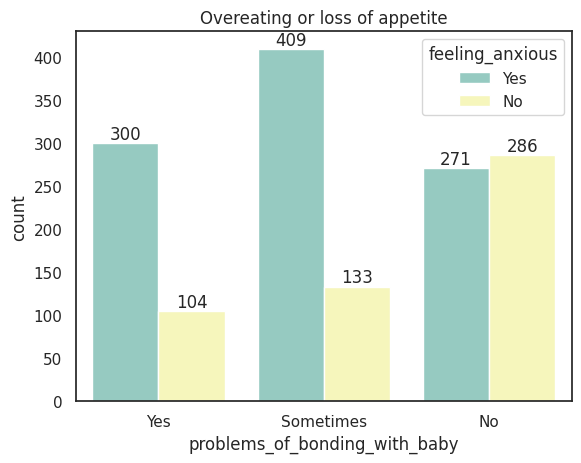

In [139]:
ax = sns.countplot(x = "problems_of_bonding_with_baby", hue = "feeling_anxious", data = df, palette="Set3")
plt.title('Overeating or loss of appetite')
for label in ax.containers:
    ax.bar_label(label)

In [140]:
df.suicide_attempt.value_counts()

,count
suicide_attempt,
No,709
Yes,459
Not interested to say,335


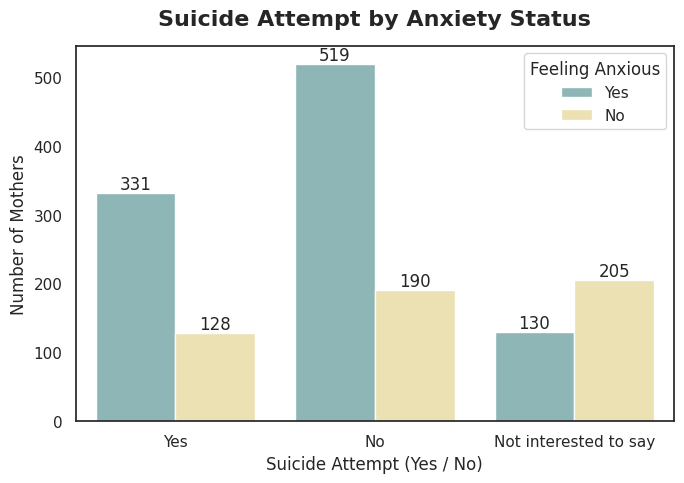

In [141]:
sns.set(style="white")

plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df,
    x='suicide_attempt',
    hue='feeling_anxious',
    palette=['#88BDBC', '#F6E7A9']
)

plt.title("Suicide Attempt by Anxiety Status", fontsize=16, weight='bold', pad=15)
plt.xlabel("Suicide Attempt (Yes / No)")
plt.ylabel("Number of Mothers")
plt.legend(title="Feeling Anxious")

for label in ax.containers:
    ax.bar_label(label)

plt.tight_layout()
plt.show()



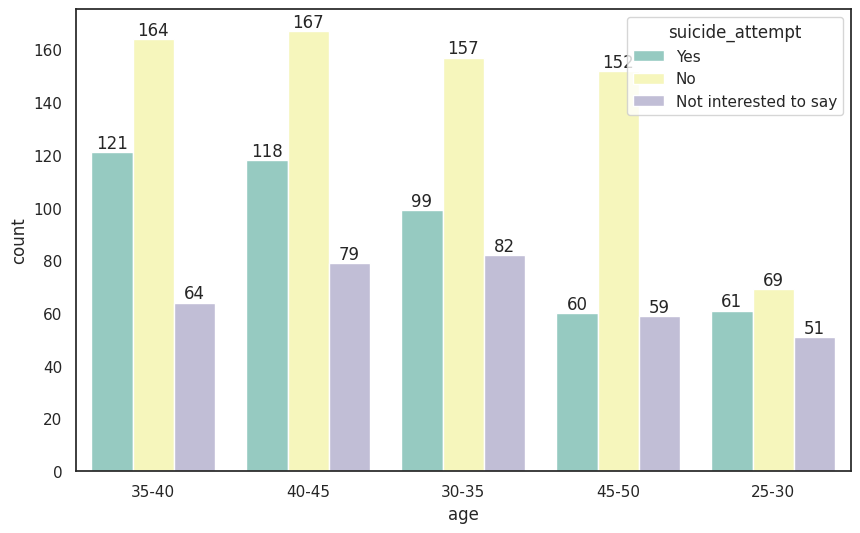

In [142]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = "age", hue = "suicide_attempt", data = df, palette="Set3")
for label in ax.containers:
    ax.bar_label(label)

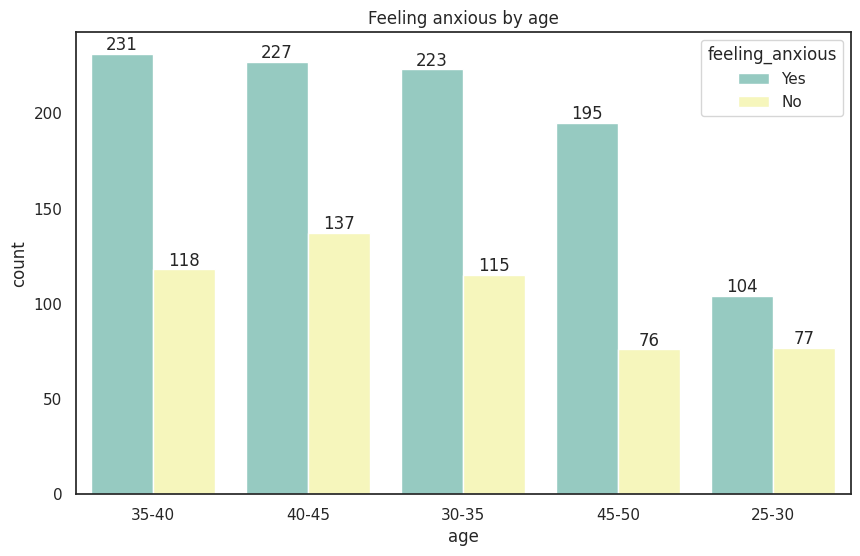

In [143]:
plt.figure(figsize=(10, 6))
plt.title('Feeling anxious by age')
ax = sns.countplot(x = "age", hue = "feeling_anxious", data = df, palette="Set3")
for label in ax.containers:
    ax.bar_label(label)

# Data Encoding

In [144]:
label_encoder = LabelEncoder()
df['feeling_anxious'] = label_encoder.fit_transform(df['feeling_anxious'])

In [145]:
df['feeling_sad_or_tearful'] = label_encoder.fit_transform(df['feeling_sad_or_tearful'])
df['irritable_towards_baby_and_partner'] = label_encoder.fit_transform(df['irritable_towards_baby_and_partner'])
df['trouble_sleeping_at_night'] = label_encoder.fit_transform(df['trouble_sleeping_at_night'])
df['problems_concentrating_or_making_decision'] = label_encoder.fit_transform(df['problems_concentrating_or_making_decision'])
df['overeating_or_loss_of_appetite'] = label_encoder.fit_transform(df['overeating_or_loss_of_appetite'])
df['feeling_of_guilt'] = label_encoder.fit_transform(df['feeling_of_guilt'])
df['problems_of_bonding_with_baby'] = label_encoder.fit_transform(df['problems_of_bonding_with_baby'])
df['suicide_attempt'] = label_encoder.fit_transform(df['suicide_attempt'])
df['age'] = label_encoder.fit_transform(df['age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        1503 non-null   int64
 1   feeling_sad_or_tearful                     1503 non-null   int64
 2   irritable_towards_baby_and_partner         1503 non-null   int64
 3   trouble_sleeping_at_night                  1503 non-null   int64
 4   problems_concentrating_or_making_decision  1503 non-null   int64
 5   overeating_or_loss_of_appetite             1503 non-null   int64
 6   feeling_anxious                            1503 non-null   int64
 7   feeling_of_guilt                           1503 non-null   int64
 8   problems_of_bonding_with_baby              1503 non-null   int64
 9   suicide_attempt                            1503 non-null   int64
dtypes: int64(10)
memory usage: 117.6 KB


# Build Model
#### *The classes are imbalance*
## Define features and the target variable


In [146]:
X = df.drop('feeling_anxious', axis=1)
y = df['feeling_anxious']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=0.05, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_predict = rfc.predict(X_test)

In [149]:
rfc.score(X_train, y_train)

0.8410981697171381

In [150]:
rfc.score(X_test, y_test)

0.8172757475083057

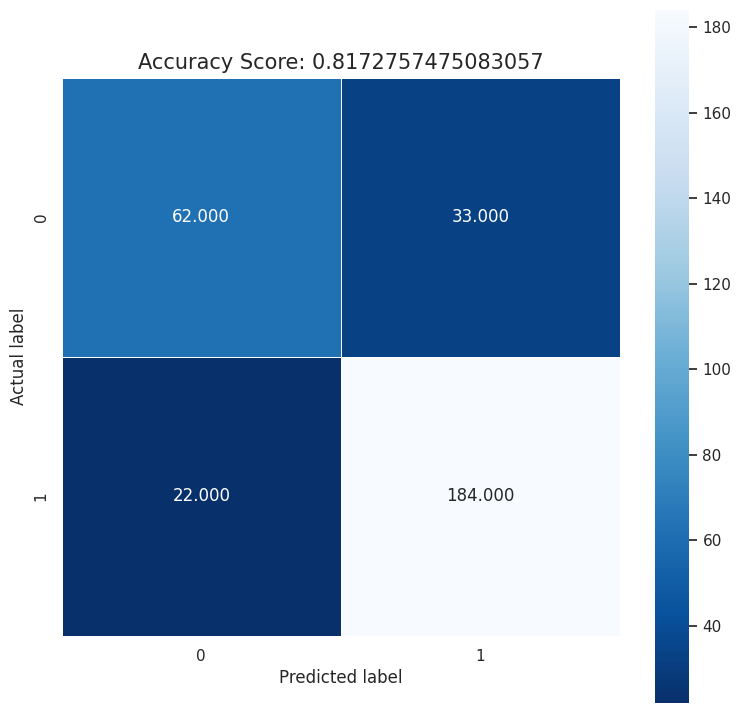

In [151]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = accuracy_score(y_test, y_predict)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [152]:
scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
scores

array([0.73754153, 0.82059801, 0.75083056, 0.88333333, 0.86      ])

In [153]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.74      0.65      0.69        95
          No       0.85      0.89      0.87       206

    accuracy                           0.82       301
   macro avg       0.79      0.77      0.78       301
weighted avg       0.81      0.82      0.81       301



In [154]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [155]:
svm_model.score(X_train, y_train)

0.7346089850249584

In [156]:
svm_model.score(X_test, y_test)

0.7574750830564784

In [157]:
y_pred = svm_model.predict(X_test)

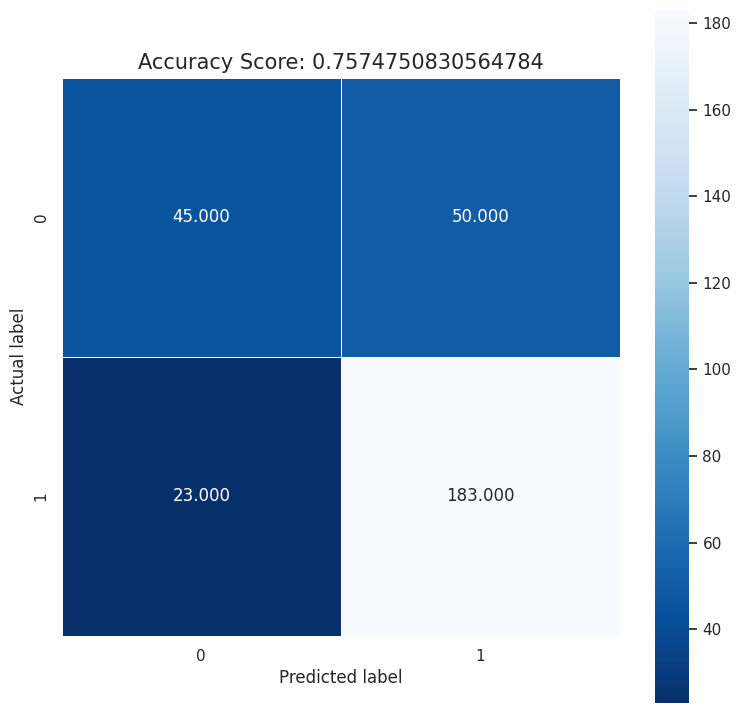

In [158]:
cnf_matrix1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = accuracy_score(y_test, y_pred)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [159]:
scores1 = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
scores1

array([0.69435216, 0.74086379, 0.7076412 , 0.66      , 0.77333333])

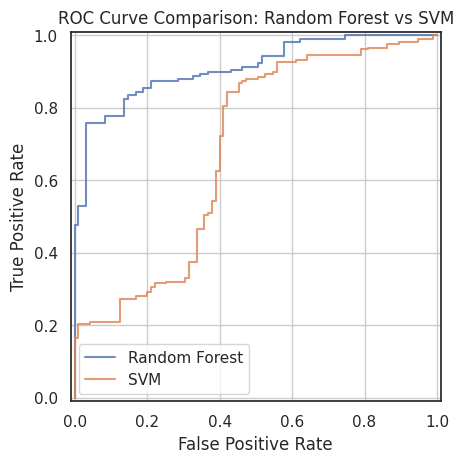

In [160]:
ax = plt.gca()

rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)

svc_disp = RocCurveDisplay.from_estimator(svm_model, X_test, y_test, ax=ax, alpha=0.8)


plt.title("ROC Curve Comparison: Random Forest vs SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend(["Random Forest", "SVM"])  # Add custom legends if needed



# Handle Imbalanced classes

In [161]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: feeling_anxious
1    774
0    428
Name: count, dtype: int64
After SMOTE: feeling_anxious
1    774
0    774
Name: count, dtype: int64


In [162]:
# SVM
svm_clf_res = SVC(kernel='rbf', probability=True)
svm_clf_res.fit(X_train_res, y_train_res)
y_pred_svm_res = svm_clf_res.predict(X_test)

# Random Forest
rf_clf_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_res.fit(X_train_res, y_train_res)
y_pred_rf_res = rf_clf_res.predict(X_test)

# Evaluation
print("SVM With SMOTE:\n", classification_report(y_test, y_pred_svm_res))
print("Random Forest With SMOTE:\n", classification_report(y_test, y_pred_rf_res))


SVM With SMOTE:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        95
           1       0.97      0.90      0.93       206

    accuracy                           0.91       301
   macro avg       0.89      0.92      0.90       301
weighted avg       0.92      0.91      0.91       301

Random Forest With SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.99      0.97      0.98       206

    accuracy                           0.97       301
   macro avg       0.96      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301



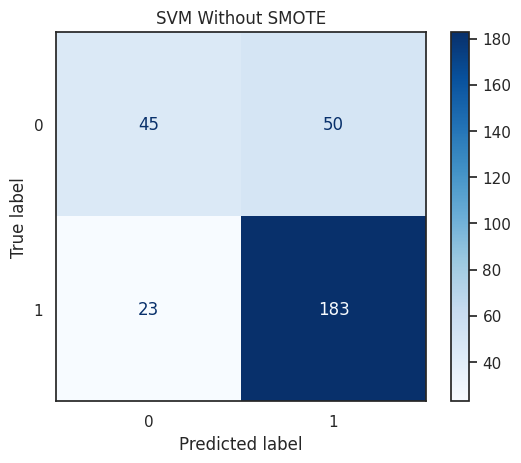

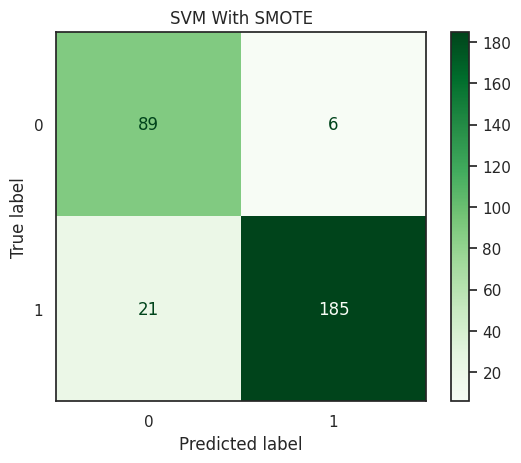

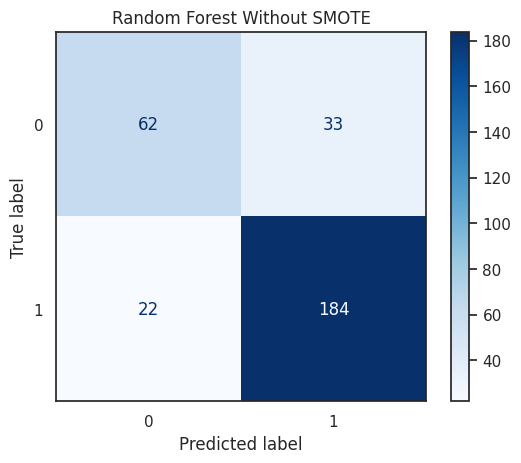

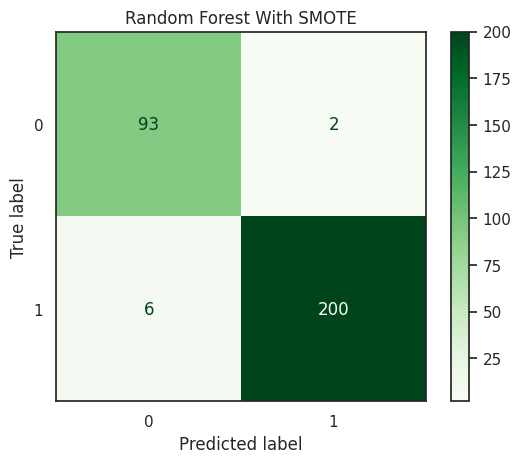

In [163]:
# SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title("SVM Without SMOTE")
plt.show()

ConfusionMatrixDisplay.from_estimator(svm_clf_res, X_test, y_test, cmap='Greens')
plt.title("SVM With SMOTE")
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Blues')
plt.title("Random Forest Without SMOTE")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_clf_res, X_test, y_test, cmap='Greens')
plt.title("Random Forest With SMOTE")
plt.show()


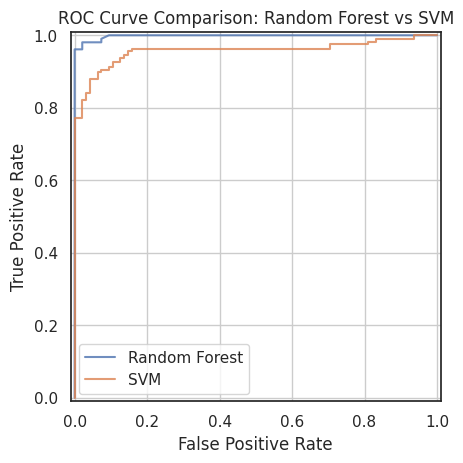

In [164]:
ax = plt.gca()

rfc_disp = RocCurveDisplay.from_estimator(rf_clf_res, X_test, y_test, ax=ax, alpha=0.8)

svc_disp = RocCurveDisplay.from_estimator(svm_clf_res, X_test, y_test, ax=ax, alpha=0.8)


plt.title("ROC Curve Comparison: Random Forest vs SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend(["Random Forest", "SVM"])  # Add custom legends if needed

